In [1]:
import sys
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

try:
    import asdfasd
except ModuleNotFoundError:
    sys.path.append(
        "../../../mlmachine"
    ) if "../../../../mlmachine" not in sys.path else None
    sys.path.append(
        "../../../prettierplot"
    ) if "../../../../prettierplot" not in sys.path else None

    import mlmachine as mlm
    from mlmachine.data import titanic
    
    from mlmachine.features.preprocessing import (
        DataFrameSelector,
        PandasPipeline,
        ContextImputer,
        PandasFeatureUnion,
    )
    from prettierplot.plotter import PrettierPlot
    import prettierplot.style as style
# import mlmachine as mlm
# from mlmachine.data import titanic

df_train, df_valid = titanic()

mlmachine_demo = mlm.Machine(
    data=df_train,
    target="Survived",
    remove_features=["PassengerId","Ticket","Name","Cabin"],
    identify_as_continuous=["Age","Fare"],
    identify_as_count=["Parch","SibSp"],
    identify_as_nominal=["Embarked"],
    identify_as_ordinal=["Pclass"],
    ordinal_encodings = {"Pclass": [1, 2, 3]},
    is_classification=True,
)
mlmachine_demo.data = mlmachine_demo.data.dropna(axis=0)

/Users/petersontylerd/.pyenv/versions/main37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


>>> category label encoding

	0 --> 0
	1 --> 1



In [2]:
encode_pipe = PandasFeatureUnion([
    ("nominal", make_pipeline(
        DataFrameSelector(include_columns=mlmachine_demo.data.mlm_dtypes["nominal"]),
        PandasPipeline(OneHotEncoder()),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=mlmachine_demo.data.mlm_dtypes["nominal"]),
    )),
])

mlmachine_demo.data = encode_pipe.fit_transform(mlmachine_demo.data)
mlmachine_demo.update_dtypes()

# EDA

<a id = 'EDA'></a>

## Category feature EDA

<a id = 'category-feature-EDA'></a>

Feature summary Feature vs. target summary Target proportion Statistical test 
 
 
 Embarked_C 
 Count 
 Proportion 
 
 
 
 
 0 
 582 
 81.741573 
 
 
 1 
 130 
 18.258427 
 
 
 
 
 
 Embarked_C 
 Died 
 Survived 
 
 
 
 
 0 
 373 
 209 
 
 
 1 
 51 
 79 
 
 
 
 
 
 Class 
 0 
 1 
 
 
 
 
 Died 
 64.089347 
 39.230769 
 
 
 Survived 
 35.910653 
 60.769231 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 -5.2212 
 0.0

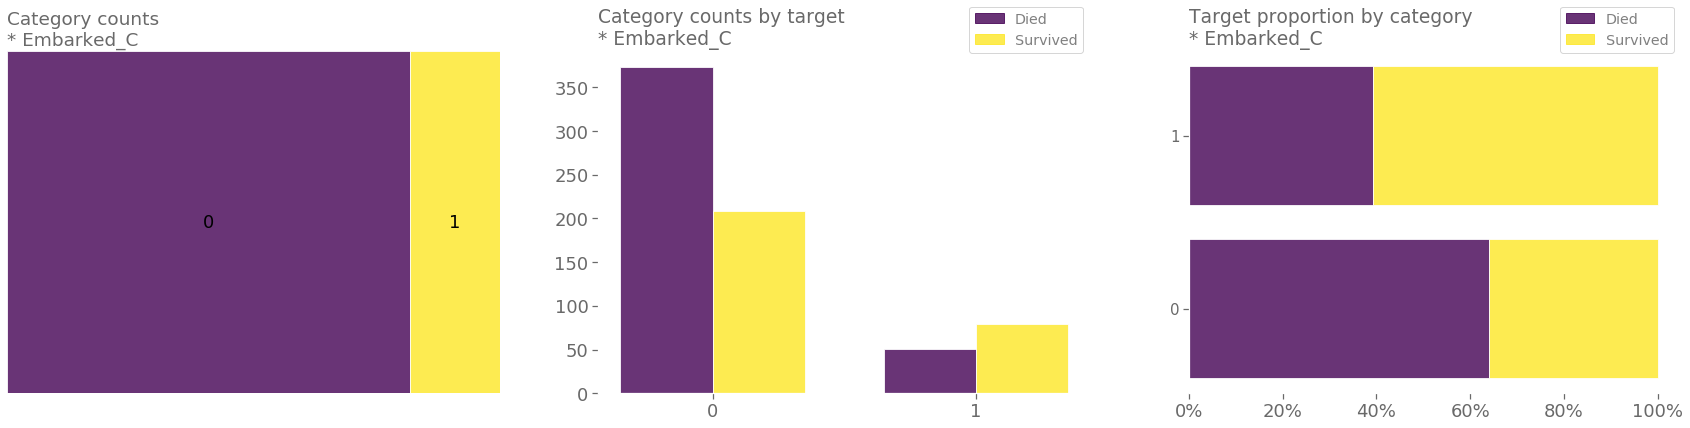

Feature summary Feature vs. target summary Target proportion Statistical test 
 
 
 Embarked_Q 
 Count 
 Proportion 
 
 
 
 
 0 
 684 
 96.067416 
 
 
 1 
 28 
 3.932584 
 
 
 
 
 
 Embarked_Q 
 Died 
 Survived 
 
 
 
 
 0 
 404 
 280 
 
 
 1 
 20 
 8 
 
 
 
 
 
 Class 
 0 
 1 
 
 
 
 
 Died 
 59.064327 
 71.428571 
 
 
 Survived 
 40.935673 
 28.571429 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 1.3066 
 0.1914

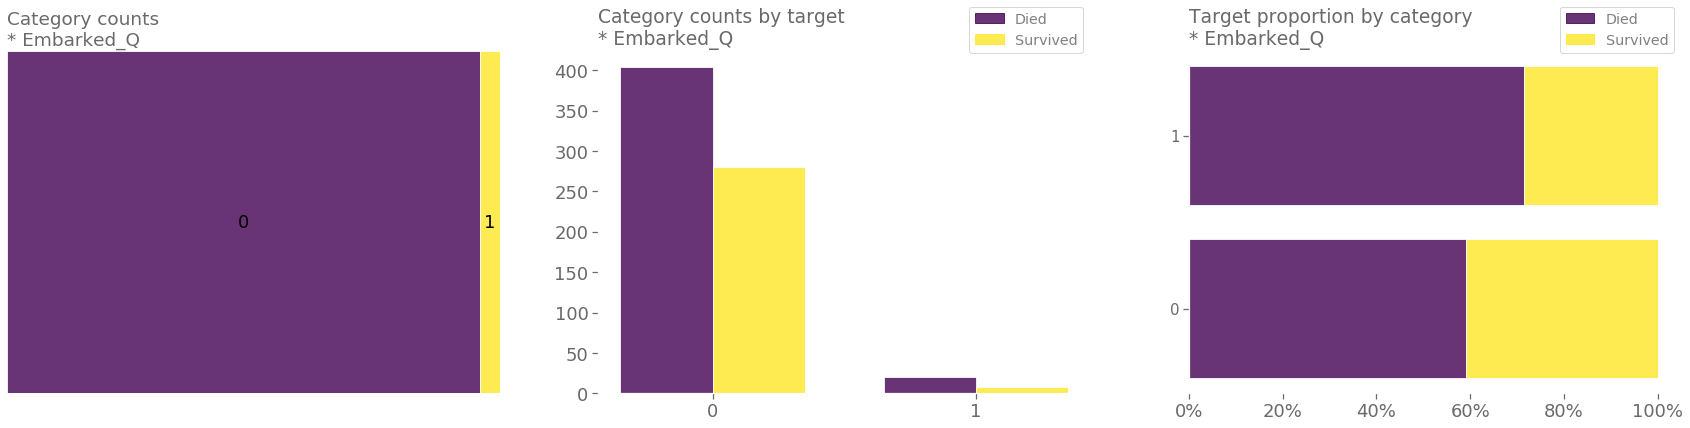

Feature summary Feature vs. target summary Target proportion Statistical test 
 
 
 Embarked_S 
 Count 
 Proportion 
 
 
 
 
 1 
 554 
 77.808989 
 
 
 0 
 158 
 22.191011 
 
 
 
 
 
 Embarked_S 
 Died 
 Survived 
 
 
 
 
 0 
 71 
 87 
 
 
 1 
 353 
 201 
 
 
 
 
 
 Class 
 0 
 1 
 
 
 
 
 Died 
 44.936709 
 63.718412 
 
 
 Survived 
 55.063291 
 36.281588 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 4.2431 
 0.0

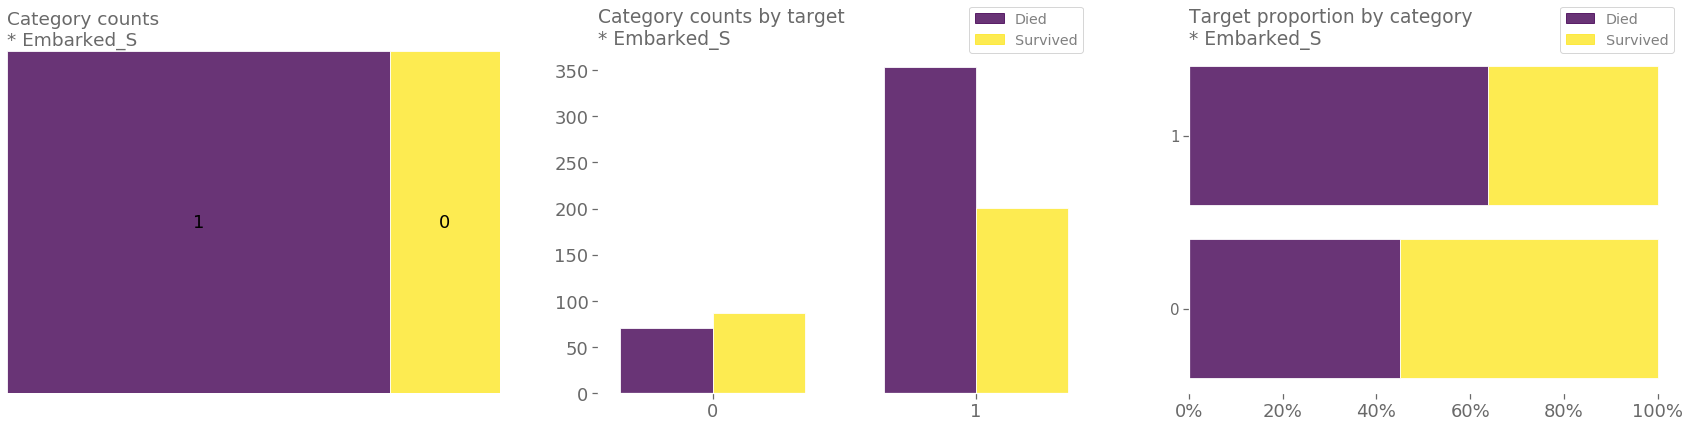

Feature summary Feature vs. target summary Target proportion 
 
 
 Pclass 
 Count 
 Proportion 
 
 
 
 
 3 
 355 
 49.859551 
 
 
 1 
 184 
 25.842697 
 
 
 2 
 173 
 24.297753 
 
 
 
 
 
 Pclass 
 Died 
 Survived 
 
 
 
 
 1 
 64 
 120 
 
 
 2 
 90 
 83 
 
 
 3 
 270 
 85 
 
 
 
 
 
 Class 
 1 
 2 
 3 
 
 
 
 
 Died 
 34.782609 
 52.023121 
 76.056338 
 
 
 Survived 
 65.217391 
 47.976879 
 23.943662

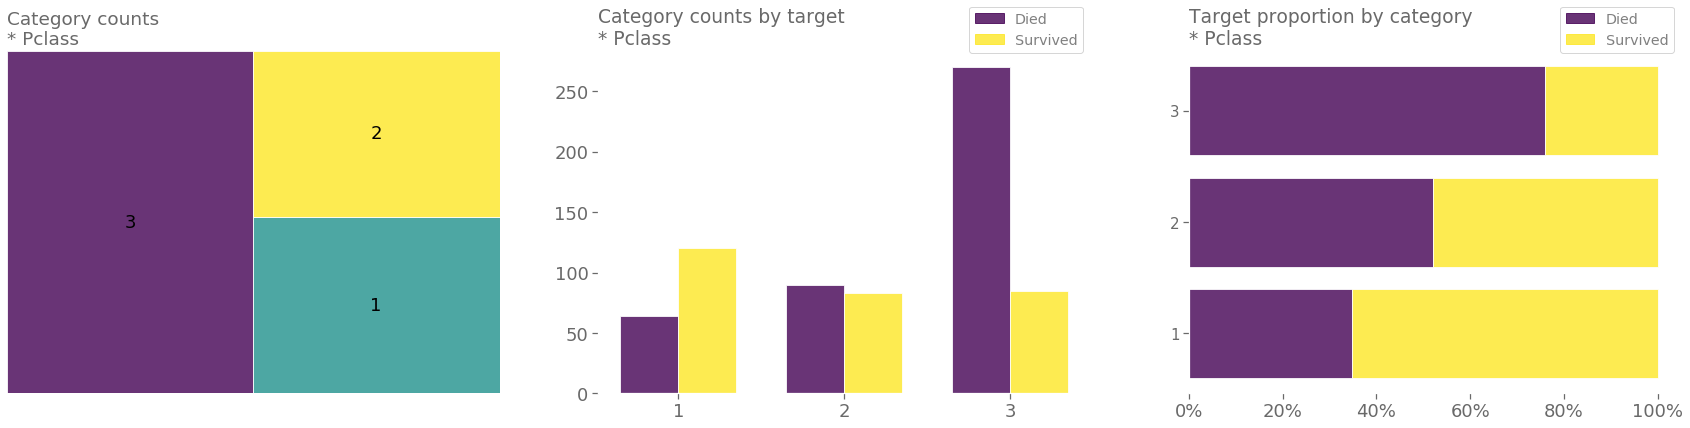

Feature summary Feature vs. target summary Target proportion Statistical test 
 
 
 Sex_female 
 Count 
 Proportion 
 
 
 
 
 0 
 453 
 63.623596 
 
 
 1 
 259 
 36.376404 
 
 
 
 
 
 Sex_female 
 Died 
 Survived 
 
 
 
 
 0 
 360 
 93 
 
 
 1 
 64 
 195 
 
 
 
 
 
 Class 
 0 
 1 
 
 
 
 
 Died 
 79.470199 
 24.710425 
 
 
 Survived 
 20.529801 
 75.289575 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 -14.3226 
 0.0

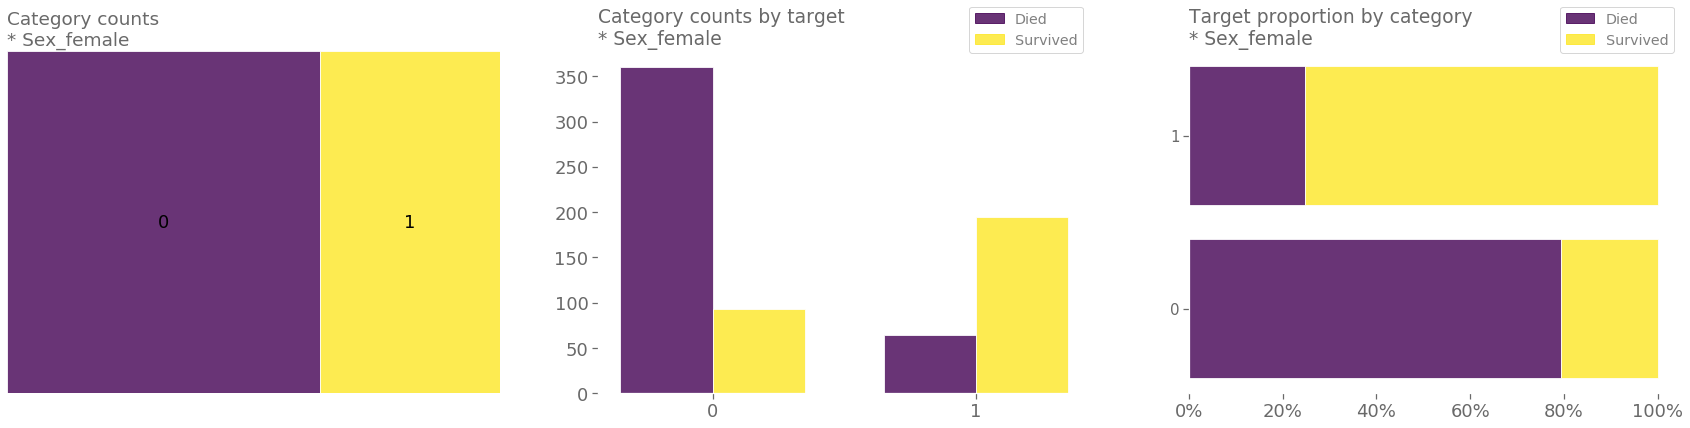

Feature summary Feature vs. target summary Target proportion Statistical test 
 
 
 Sex_male 
 Count 
 Proportion 
 
 
 
 
 1 
 453 
 63.623596 
 
 
 0 
 259 
 36.376404 
 
 
 
 
 
 Sex_male 
 Died 
 Survived 
 
 
 
 
 0 
 64 
 195 
 
 
 1 
 360 
 93 
 
 
 
 
 
 Class 
 0 
 1 
 
 
 
 
 Died 
 24.710425 
 79.470199 
 
 
 Survived 
 75.289575 
 20.529801 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 14.3226 
 0.0

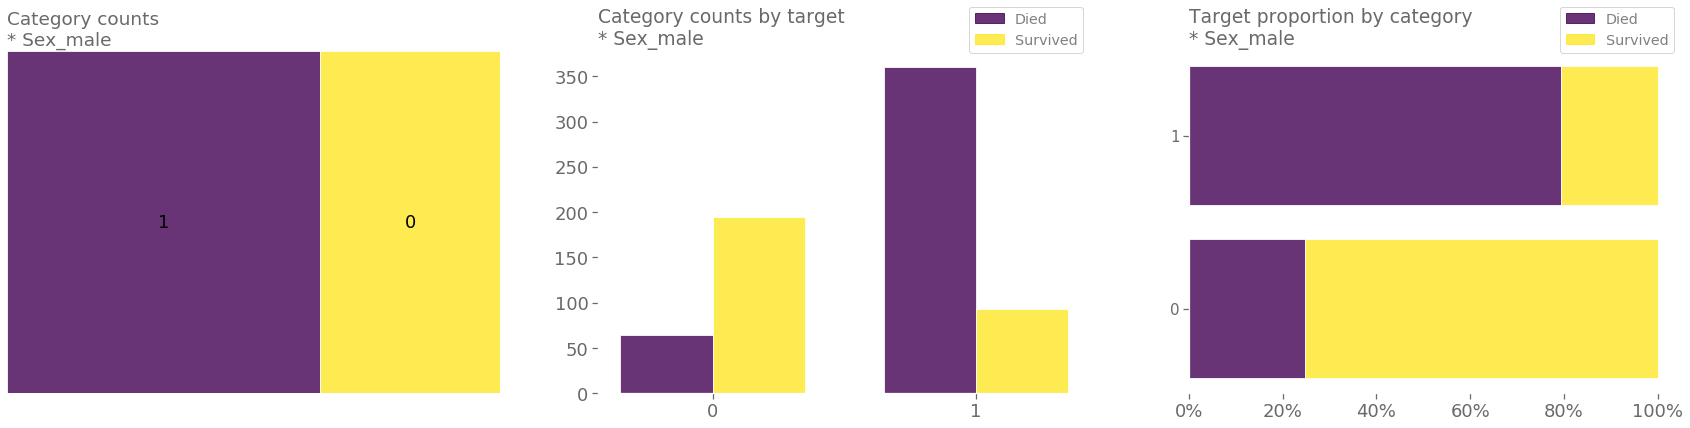

In [3]:
# number features
for feature in mlmachine_demo.data.mlm_dtypes["category"]:
    mlmachine_demo.eda_cat_target_cat_feat(
        feature=feature,
        level_count_cap=10,
        legend_labels=["Died","Survived"],
        chart_scale=15
    )

## Count feature EDA

<a id = 'Count-feature-EDA'></a>

Feature summary,Feature vs. target summary,Target proportion
Parch,Count,Proportion
0,519,72.893258
1,110,15.449438
2,68,9.550562
3,5,0.702247
5,5,0.702247
4,4,0.561798
6,1,0.140449
Parch,Died,Survived
0,335,184


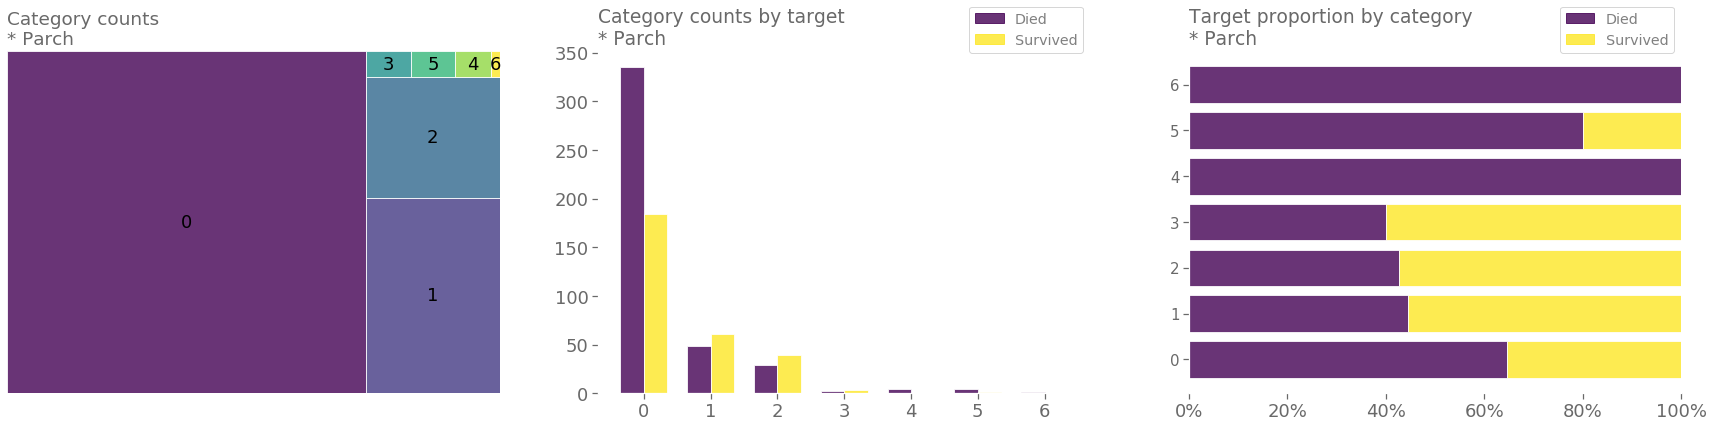

Feature summary,Feature vs. target summary,Target proportion
SibSp,Count,Proportion
0,469,65.870787
1,183,25.702247
2,25,3.511236
4,18,2.528090
3,12,1.685393
5,5,0.702247
SibSp,Died,Survived
0,296,173
1,86,97


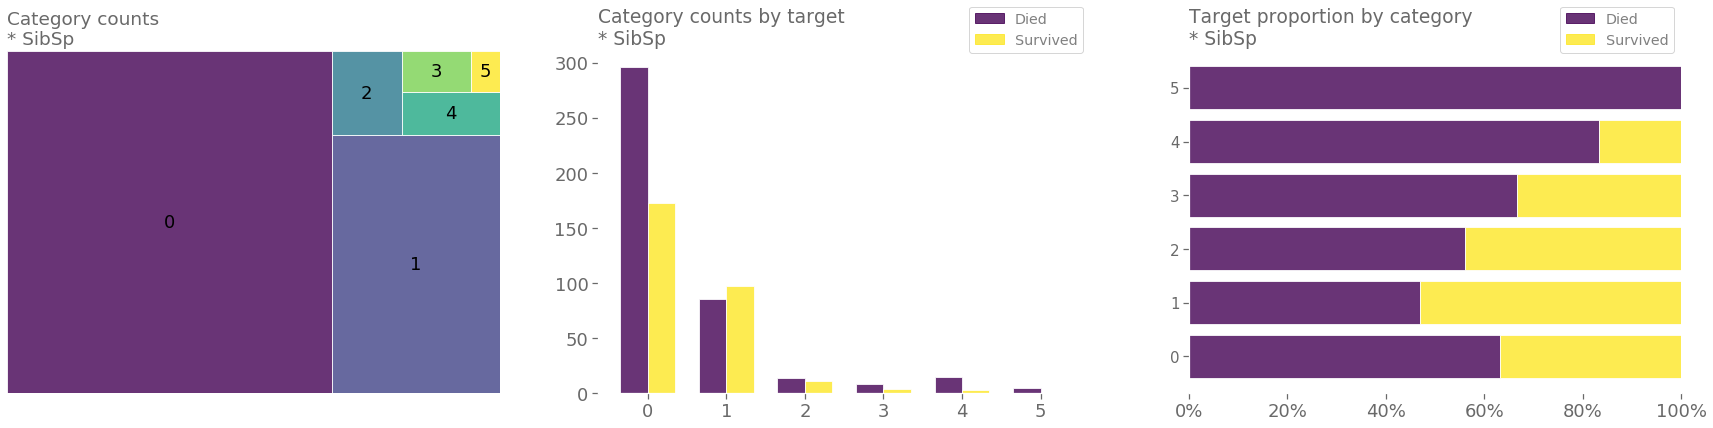

In [4]:
# number features
for feature in mlmachine_demo.data.mlm_dtypes["count"]:
    mlmachine_demo.eda_cat_target_cat_feat(
        feature=feature,
        level_count_cap=10,
        legend_labels=["Died","Survived"],
        chart_scale=15
    )

## Continuous feature EDA

<a id = 'Continuous-feature-EDA'></a>

Feature summary Feature vs. target summary Statistical test 
 
 
 
 Age 
 
 
 
 
 count 
 712.000000 
 
 
 mean 
 29.642093 
 
 
 std 
 14.492933 
 
 
 min 
 0.420000 
 
 
 25% 
 20.000000 
 
 
 50% 
 28.000000 
 
 
 75% 
 38.000000 
 
 
 max 
 80.000000 
 
 
 missing 
 0.000000 
 
 
 skew 
 0.388060 
 
 
 kurtosis 
 0.178216 
 
 
 
 
 
 Class 
 Count 
 Proportion 
 Mean 
 StdDev 
 
 
 
 
 Died 
 424.0 
 59.550562 
 30.626179 
 14.155388 
 
 
 Survived 
 288.0 
 40.449438 
 28.193299 
 14.833327 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 2.2043 
 0.0275

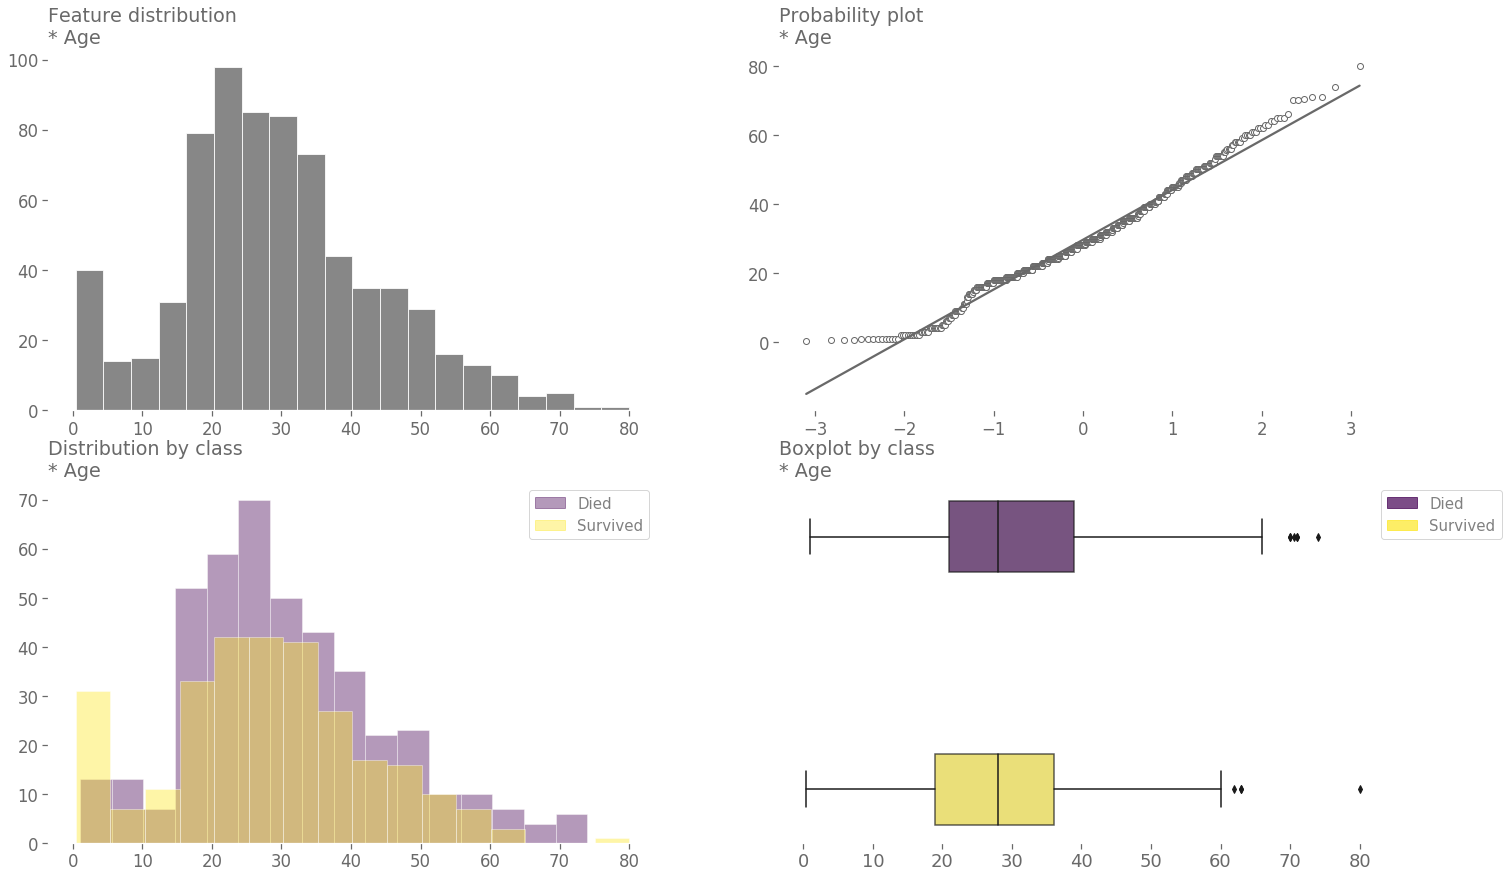

In [7]:
mlmachine_demo.eda_cat_target_num_feat(
    feature="Age",
    legend_labels=["Died","Survived"],
)

##### Correlation

In [8]:
# correlation heat map
p = PrettierPlot()
ax = p.make_canvas()
p.corr_heatmap(
    df=mlmachine_demo.recombine_data(),
#     df=train.data,
    annot=True,
    ax=ax,
)

NameError: name 'PrettierPlot' is not defined

In [9]:
# correlation heat map with most highly correlated features relative to the target
p = PrettierPlot(plot_orientation='tall',chart_scale=10)
ax = p.make_canvas()
p.corr_heatmap_target(
    df=train.data,
    target=train.target,
    thresh=0.01,
    annot=True,
    ax=ax,
)

NameError: name 'PrettierPlot' is not defined

In [ ]:
# pair plot
p = PrettierPlot(chart_scale=15)
p.pair_plot(
    df=train.data[["Age","Fare"]],
    target=train.target,
    diag_kind="auto",
    legend_labels=["Died","Survived"],
)

## Faceting

<a id = 'Faceting'></a>

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship, embark location by passenger class", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Embarked",
    y=train.target.name,
    split="Pclass",
    y_units="ff",
    ax=ax,
)

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship, passenger class by gender", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Pclass",
    y=train.target.name,
    split="Sex",
    y_units="ff",
    ax=ax,
)

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship,embark location by gender", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Embarked",
    y=train.target.name,
    split="Sex",
    y_units="ff",
    ax=ax,
)

In [ ]:
#
p = PrettierPlot()
p.facet_two_cat_point(
    df=train.recombine_data(train.data, train.target),
    x="Sex",
    y=train.target.name,
    split="Pclass",
    cat_col="Embarked",
    aspect=1.0,
    height=5,
    bbox=(1.3, 1.2),
    legend_labels=["1st class", "2nd class", "3rd class"],
)

In [ ]:
#
p = PrettierPlot()
p.facet_two_cat_point(
    df=train.recombine_data(train.data, train.target).dropna(subset=["Embarked"]),
    x="Embarked",
    y=train.target.name,
    split="Pclass",
    cat_col="Sex",
    aspect=1.0,
    height=5,
    bbox=(1.5, 0.8),
    legend_labels=["1st class", "2nd class", "3rd class"],
)

In [ ]:
#
p = PrettierPlot()
p.facet_cat_num_hist(
    df=train.recombine_data(train.data, train.target),
    split=train.target.name,
    legend_labels=["Died", "Lived"],
    cat_row="Sex",
    cat_col="Embarked",
    num_col="Age",
    bbox=(1.9, 1.0),
    height=4,
    aspect=1,
)

In [ ]:
#
p = PrettierPlot(chart_scale=15)
p.facet_cat_num_scatter(
    df=train.recombine_data(train.data, train.target),
    split=train.target.name,
    legend_labels=["Died", "Lived"],
    cat_row="Sex",
    cat_col="Embarked",
    x="Fare",
    y="Age",
    bbox=(1.9, 1.0),
    height=4,
    aspect=1,
)

## Target variable evaluation

<a id = 'Target-variable-evaluation'></a>

In [ ]:
# null score
pd.Series(train.target).value_counts(normalize=True)

# Data preparation

<a id = 'Data-preparation'></a>

## Missing data


<a id = 'Missing-data'></a>

##### Training

In [ ]:
# evaluate missing data
train.eda_missing_summary()

In [ ]:
# missingno matrix
msno.matrix(train.data)

In [ ]:
# missingno bar
msno.bar(train.data)

In [ ]:
# missingno heatmap
msno.heatmap(train.data)

In [ ]:
# missingno dendrogram
msno.dendrogram(train.data)

##### Validation

In [ ]:
# evaluate missing data
valid.eda_missing_summary()

In [ ]:
# missingno matrix
msno.matrix(valid.data)

In [ ]:
# missingno bar
msno.bar(valid.data)

In [ ]:
# missingno heatmap
msno.heatmap(valid.data)

In [ ]:
# missingno dendrogram
msno.dendrogram(valid.data)

##### Training vs. validation


In [ ]:
# compare feature with missing data
train.missing_col_compare(train=train.data, validation=valid.data)

##### Impute

In [ ]:
train.data.info()

In [ ]:
# impute pipeline
impute_pipe = PandasFeatureUnion([
    ("age", make_pipeline(
        DataFrameSelector(include_columns=["Age","Pclass"]),
        ContextImputer(null_col="Age", context_col="Pclass", strategy="mean")
    )),
    ("fare", make_pipeline(
        DataFrameSelector(include_columns=["Fare","Pclass"]),
        ContextImputer(null_col="Fare", context_col="Pclass")
    )),
    ("embarked", make_pipeline(
        DataFrameSelector(include_columns=["Embarked"]),
        PandasPipeline(SimpleImputer(strategy="most_frequent"))
    )),
    ("cabin", make_pipeline(
        DataFrameSelector(include_columns=["Cabin"]),
        PandasPipeline(SimpleImputer(strategy="constant", fill_value="X"))
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=["Age","Fare","Embarked","Cabin"])
    )),
])

train.data = impute_pipe.fit_transform(train.data)
valid.data = impute_pipe.transform(valid.data)

In [ ]:
train.eda_missing_summary()

In [ ]:
valid.eda_missing_summary()

## Feature engineering

<a id = 'Feature-engineering'></a>

### Handcrafted

<a id = 'Handcrafted'></a>

In [ ]:
### training data
# parse titles to learn gender, and identify rare titles which may convey status
title = [i.split(",")[1].split(".")[0].strip() for i in train.data["Name"]]
train.data["Title"] = pd.Series(
    title,
    index=train.data.index,
    dtype="object",
)
train.data["Title"] = train.data["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)
train.data["Title"] = train.data["Title"].map(
    {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 1, "Mlle": 1, "Mrs": 1, "Mr": 2, "Rare": 3}
)
train.data["Title"] = train.data["Title"].astype("category")

# distill cabin feature
train.data["CabinQuarter"] = pd.Series(
    [i[0] if not pd.isnull(i) else "X" for i in train.data["Cabin"]],
    index=train.data.index,
    dtype="category",
)

# family size features and binning
train.data["FamilySize"] = train.data["SibSp"] + train.data["Parch"] + 1
train.data["FamilySize"] = train.data["FamilySize"].astype("int64")

In [ ]:
### validation data
# parse titles to learn gender, and identify rare titles which may convey status
title = [i.split(",")[1].split(".")[0].strip() for i in valid.data["Name"]]
valid.data["Title"] = pd.Series(
    title,
    index=valid.data.index,
    dtype="object",
)
valid.data["Title"] = valid.data["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)
valid.data["Title"] = valid.data["Title"].map(
    {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 1, "Mlle": 1, "Mrs": 1, "Mr": 2, "Rare": 3}
)
valid.data["Title"] = valid.data["Title"].astype("category")

# distill cabin feature
valid.data["CabinQuarter"] = pd.Series(
    [i[0] if not pd.isnull(i) else "X" for i in valid.data["Cabin"]],
    index=valid.data.index,
    dtype="category",
)

# additional features
valid.data["FamilySize"] = valid.data["SibSp"] + valid.data["Parch"] + 1
valid.data["FamilySize"] = valid.data["FamilySize"].astype("int64")

### Polynomial features

<a id = 'Polynomial-features'></a>

In [ ]:
# transform pipe
polynomial_pipe = PandasFeatureUnion([
    ("polynomial", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["continuous"]),
        PandasPipeline(PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_mlm_dtypes=["continuous"], exclude_columns=["Name","Cabin"]),
    )),
])

train.data = polynomial_pipe.fit_transform(train.data)
valid.data = polynomial_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()

### Encoding

<a id = 'Encoding'></a>

##### Evaluate

In [ ]:
### training data
# counts of unique values in training data string columns
train.data[train.data.mlm_dtypes["category"]].apply(pd.Series.nunique, axis=0)

In [ ]:
### training data
# print unique values in each category columns
for col in train.data.mlm_dtypes["category"]:
    print(col, np.unique(train.data[col]))

In [ ]:
### validation data
# counts of unique values in validation data string columns
valid.data[valid.data.mlm_dtypes["category"]].apply(pd.Series.nunique, axis=0)

In [ ]:
### validation data
# print unique values in each category columns
for col in valid.data.mlm_dtypes["category"]:
    print(col, np.unique(valid.data[col]))

In [ ]:
# identify values that are present in the training data but not the validation data, and vice versa
for col in train.data.mlm_dtypes["category"]:
    train_values = train.data[col].unique()
    valid_values = valid.data[col].unique()

    train_diff = set(train_values) - set(valid_values)
    valid_diff = set(valid_values) - set(train_values)

    if len(train_diff) > 0 or len(valid_diff) > 0:
        print("\n\n*** " + col)
        print("Value present in training data, not in validation data")
        print(train_diff)
        print("Value present in validation data, not in training data")
        print(valid_diff)

##### Encode

In [ ]:
# encode pipeline
encode_pipe = PandasFeatureUnion([
    ("nominal", make_pipeline(
        DataFrameSelector(include_columns=train.data.mlm_dtypes["nominal"]),
        PandasPipeline(OneHotEncoder(drop="first")),
    )),
    ("ordinal", make_pipeline(
        DataFrameSelector(include_columns=list(ordinal_encodings.keys())),
        PandasPipeline(OrdinalEncoder(categories=list(ordinal_encodings.values()))),
    )),
    ("bin", make_pipeline(
        DataFrameSelector(include_columns=train.data.mlm_dtypes["continuous"]),
        PandasPipeline(KBinsDiscretizer(encode="ordinal")),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=train.data.mlm_dtypes["nominal"] + list(ordinal_encodings.keys())),
    )),
])

train.data = encode_pipe.fit_transform(train.data)
valid.data = encode_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()

In [ ]:
# target encoding pipe
target_encode_pipe = PandasFeatureUnion([
    ("target", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=TargetEncoder,
        ),
    )),
    ("woe", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=WOEEncoder,
        ),
    )),
    ("catboost", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=CatBoostEncoder,
        ),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_mlm_dtypes=["category"]),
    )),
])

train.data = target_encode_pipe.fit_transform(train.data)
valid.data = target_encode_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()